# Derivatives with PyTorch

### Dr. Tirthajyoti Sarkar<br><br>Fremont, CA 94536 <br><br>April 2019

In [1]:
import torch
import numpy as np

### Define a simple algebraic function
Let's say,
### $$ y = f(x) = x^3-7x^2+11x $$
Therefore,
### $$ y' = f'(x) = \frac{d}{dx}(x^3-7x^2+11x) =  3x^2-14x+11 $$

In [2]:
def func(x):
    return (x**3 - 7*x**2 + 11*x)

### Now, let's define a tensor variable with the argument `requires_grad` = `True`

In [3]:
x = torch.tensor(2.0, requires_grad=True)

### Differentiation at $x=2$ yields,
### $$ f'(x)\mid _{x=2} = (3x^2-14x+11)\mid_{x=2} = -5 $$

### Let's define `y` as the function of `x` i.e. `func(x)`

In [4]:
y = func(x)

### Use the `backward()` method on `y`

In [5]:
y.backward()

### Show the value of the derivative with the `grad()` method on `x` (Note that we use `grad` on `x` and not on `y`)

In [6]:
x.grad

tensor(-5.)

### So, if we want to change the computation at a different value of `x`, we can do that easily by re-defining `x`

In [7]:
x = torch.tensor(3.0, requires_grad=True)

In [8]:
y.backward()

RuntimeError: Trying to backward through the graph a second time, but the buffers have already been freed. Specify retain_graph=True when calling backward the first time.

### So, we learned that we need to switch on the `retain_graph` to `True` the first time the `backward()` method is called to retain the computation graph structure and taking derivatives afterwards

In [9]:
x = torch.tensor(2.0, requires_grad=True)

In [10]:
y= func(x)

In [11]:
y.backward(retain_graph=True)

In [12]:
x.grad

tensor(-5.)

In [13]:
x = torch.tensor(3.0, requires_grad=True)

In [14]:
y= func(x)

In [15]:
y.backward()

In [16]:
x.grad

tensor(-4.)

## Partial derivative

Let's suppose,
### $$f(u,v) = 3u^2v - 4v^3$$
Therefore,
### $$ \frac{\partial}{\partial u}{f(u,v)}=6uv; \ \frac{\partial}{\partial v}{f(u,v)}=3u^2-12v^2$$

### Let's define `u`, `v`, and the function

In [23]:
u = torch.tensor(2.0, requires_grad=True)
v = torch.tensor(1.0, requires_grad=True)

In [24]:
f = 3*u**2*v - 4*v**3

### $$\frac{\partial f(2,1)}{\partial u}=6uv\mid_{(u=2,v=1)}=12$$
### $$\frac{\partial f(2,1)}{\partial u}=3u^2-12v^2\mid_{(u=2,v=1)}=0$$

In [26]:
f.backward(retain_graph=True)

In [27]:
u.grad

tensor(12.)

In [28]:
v.grad

tensor(0.)

## Derivatives w.r.t. to a vector
PyTorch computes derivatives of scalar functions only but if we pass a vector then essentially it computes derivatives element wise and stores them in an array of same dimension.

Let's say,
### $$y = x_1^2+x_2^2+x_3^2$$
After differentiation, the $y$ looks like following,
### $$\frac{dy}{dx} = [2x_1 \ \ 2x_2 \ \ 2x_3] $$

### Let's illustrate through a graphical example

In [41]:
# Create a vector of x values
x = torch.linspace(-10.0,10.0,requires_grad=True)

In [44]:
# Store x-squared values in another vector
x_squared = x**2

In [45]:
# Sum of x squared as a tensor
y = torch.sum(x**2)

In [46]:
# Differentiating the sum vector
y.backward()

In [47]:
import matplotlib.pyplot as plt

### Plot the original function values and the derivative on the same graph. Note the use of `detach` method before applying `numpy()` method for tensors with `requires_grad=True`

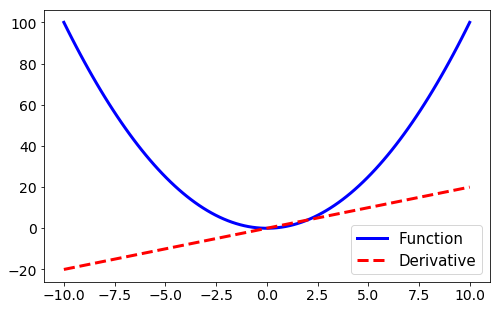

In [50]:
plt.figure(figsize=(8,5))
plt.plot(x.detach().numpy(),x_squared.detach().numpy(),label='Function',color='blue',lw=3)
plt.plot(x.detach().numpy(),x.grad.detach().numpy(),label='Derivative',color='red',lw=3,linestyle='--')
plt.legend(fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

### Another example with the ReLU function

In [51]:
import torch.nn.functional as Fun

In [52]:
x = torch.linspace(-2.0,2.0,100,requires_grad=True)

In [53]:
x_relu = Fun.relu(x)

In [54]:
y = torch.sum(Fun.relu(x))

In [55]:
y.backward()

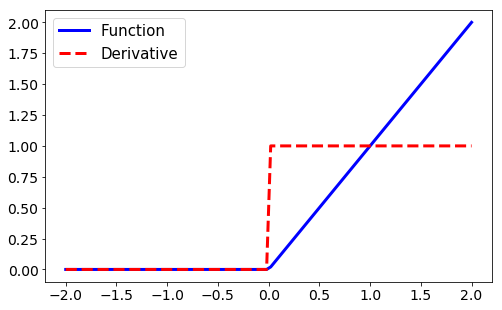

In [56]:
plt.figure(figsize=(8,5))
plt.plot(x.detach().numpy(),x_relu.detach().numpy(),label='Function',color='blue',lw=3)
plt.plot(x.detach().numpy(),x.grad.detach().numpy(),label='Derivative',color='red',lw=3,linestyle='--')
plt.legend(fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()